In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('pqrst_intervals.csv')
df2 = pd.read_csv(r'C:\ECG Project\unig_features.csv')

In [4]:
# Step 2: Rename Features
df1 = df1.rename(columns={
    'P Amplitude': 'P_Amp_V6',
    'Q Amplitude': 'Q_Amp_V6',
    'QRS Duration (ms)': 'QRS_Dur_V6',
    'R Amplitude': 'R_Amp_V6',
    'S Amplitude': 'S_Amp_V6',
    'T Amplitude': 'T_Amp_V6',
    'P onset': 'P_On_V6', 
    'P Peak': 'P+_Amp_V6',
    'T onset': 'T_On_V6',
    'T peak': 'T+_Amp_V6',
    'T end': 'T-_Amp_V6'
})


In [5]:
# Select the relevant columns from both datasets
df1_selected = df1[['ecg_id', 'P_Amp_V6', 'Q_Amp_V6', 'QRS_Dur_V6', 'R_Amp_V6', 'S_Amp_V6', 'T_Amp_V6', 'P_On_V6','P+_Amp_V6','T_On_V6','T+_Amp_V6','T-_Amp_V6']]
df2_selected = df2[['ecg_id', 'P_Amp_V6', 'Q_Amp_V6', 'QRS_Dur_V6', 'R_Amp_V6', 'S_Amp_V6', 'T_Amp_V6', 'P_On_V6','P+_Amp_V6','T_On_V6','T+_Amp_V6','T-_Amp_V6']]


In [9]:
# Merge the selected columns from both datasets based on 'ecg_id'
merged_df = pd.merge(df1_selected, df2_selected, on='ecg_id', suffixes=('_df1', '_df2'), how='inner')


In [11]:
# Calculate the correlation matrix for the merged dataset
correlation_merged = merged_df.corr()

print(correlation_merged)


                  ecg_id  P_Amp_V6_df1  Q_Amp_V6_df1  QRS_Dur_V6_df1  \
ecg_id          1.000000      0.051959      0.025389        0.074547   
P_Amp_V6_df1    0.051959      1.000000      0.456341       -0.024051   
Q_Amp_V6_df1    0.025389      0.456341      1.000000        0.124457   
QRS_Dur_V6_df1  0.074547     -0.024051      0.124457        1.000000   
R_Amp_V6_df1   -0.049578     -0.308426     -0.430742        0.107660   
S_Amp_V6_df1    0.046671     -0.072680     -0.093702       -0.014624   
T_Amp_V6_df1   -0.095676     -0.419207     -0.409477       -0.270830   
P_On_V6_df1    -0.023385     -0.008066     -0.066569       -0.126844   
P+_Amp_V6_df1  -0.021565      0.007746     -0.070642       -0.132517   
T_On_V6_df1     0.060356      0.062230      0.050246        0.316904   
T+_Amp_V6_df1   0.001332     -0.066794     -0.066841        0.136618   
T-_Amp_V6_df1  -0.045308     -0.256151     -0.236983        0.013301   
P_Amp_V6_df2    0.003328      0.258303     -0.204623       -0.21

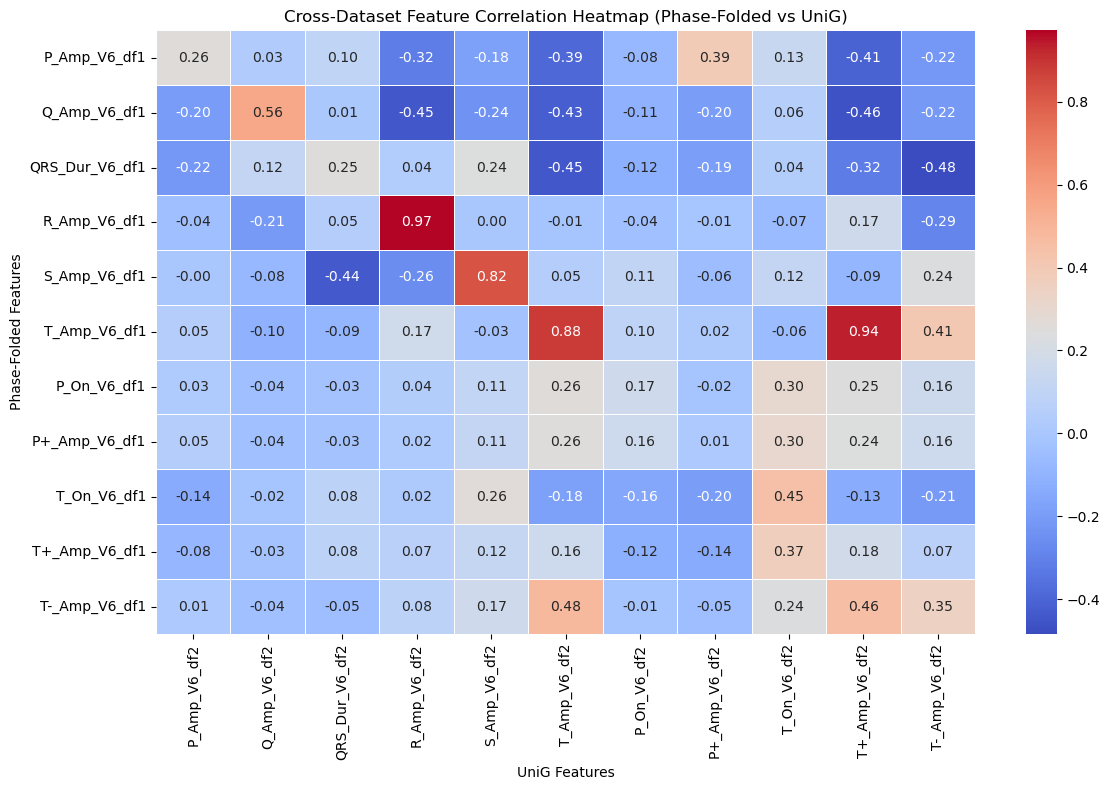

In [15]:
# Step 2: Select the relevant columns from both datasets (excluding 'ecg_id')
df1_cols = [col for col in merged_df.columns if col.endswith('_df1')]
df2_cols = [col for col in merged_df.columns if col.endswith('_df2')]

# Step 3: Compute the cross-correlation matrix 
cross_corr_matrix = pd.DataFrame(index=df1_cols, columns=df2_cols)

for col1 in df1_cols:
    for col2 in df2_cols:
        cross_corr_matrix.loc[col1, col2] = merged_df[col1].corr(merged_df[col2])

# Step 4: Convert values to float for heatmap plotting
cross_corr_matrix = cross_corr_matrix.astype(float)

# Step 5: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Cross-Dataset Feature Correlation Heatmap (Phase-Folded vs UniG)')
plt.xlabel('UniG Features')
plt.ylabel('Phase-Folded Features')
plt.savefig("UniGCorr.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()



In [22]:
cross_corr_matrix

,P_Amp_V6_df2,Q_Amp_V6_df2,QRS_Dur_V6_df2,R_Amp_V6_df2,S_Amp_V6_df2,T_Amp_V6_df2,P_On_V6_df2,P+_Amp_V6_df2,T_On_V6_df2,T+_Amp_V6_df2,T-_Amp_V6_df2
P_Amp_V6_df1,0.258303,0.033178,0.099728,-0.318688,-0.184495,-0.387856,-0.075633,0.390802,0.131710,-0.409179,-0.218753
Q_Amp_V6_df1,-0.204623,0.555626,0.009273,-0.447462,-0.236983,-0.426725,-0.108347,-0.195374,0.055316,-0.463338,-0.215153
QRS_Dur_V6_df1,-0.217698,0.117964,0.250914,0.038426,0.243458,-0.446402,-0.119115,-0.193836,0.041344,-0.320602,-0.484111
R_Amp_V6_df1,-0.043925,-0.210477,0.049619,0.972464,0.000546,-0.014887,-0.039744,-0.011030,-0.068180,0.168416,-0.287066
S_Amp_V6_df1,-0.004475,-0.078376,-0.436068,-0.259993,0.821489,0.047270,0.105819,-0.055164,0.118241,-0.087983,0.235141
T_Amp_V6_df1,0.045758,-0.104070,-0.086503,0.172529,-0.028008,0.883201,0.095320,0.021203,-0.059447,0.935614,0.408281
P_On_V6_df1,0.026092,-0.043111,-0.025417,0.041240,0.110297,0.257639,0.166313,-0.016124,0.297676,0.249640,0.158344
P+_Amp_V6_df1,0.045995,-0.037429,-0.025724,0.022803,0.114752,0.255380,0.159667,0.014695,0.302504,0.242696,0.159955
T_On_V6_df1,-0.118993,0.011181,0.050535,0.015443,0.211790,-0.135908,-0.151255,-0.185345,0.490871,-0.108957,-0.154005
T+_Amp_V6_df1,-0.082050,-0.028913,0.081192,0.070559,0.121896,0.161561,-0.120570,-0.142208,0.366041,0.177411,0.070973
